# About the Data
The data set used is a subset from the 1987 National Indonesia Contraceptive Prevalence Survey.  The data comes from 1,473 married women who were not pregnant or did not know that they were pregnant at the time of the survey.  They were scored according to their answers related to ten separate categories.  Two of the categories are numerical: "w_age" (wife's age, between 15 and 49) and "num_kid" (number of children ever born).  Four of the categories are categorical: "w_ed" (wife's education), "h_ed" (husband's education), "h_job" (husband's occupation), and "sol" (standard-of-living), with each category rated one of four values: 1 (low), 2, 3, or 4 (high).  Three of the categories have binary values: "w_islam" (wife is Islamic, 0=no, 1=yes), "home" (wife stays at home, 0=no, 1=yes), and "med_ex" (media exposure, 0=bad, 1=good).  The class attribute has three categories related to contraception use: 1 = no-use, 2 = long-term, 3 = short-term.

   1. Wife's age                     (numerical)
   2. Wife's education               (categorical)      1=low, 2, 3, 4=high
   3. Husband's education            (categorical)      1=low, 2, 3, 4=high
   4. Number of children ever born   (numerical)
   5. Wife's religion                (binary)           0=Non-Islam, 1=Islam
   6. Wife's now working             (binary)           0=Yes, 1=No
   7. Husband's occupation           (categorical)      1, 2, 3, 4
   8. Standard-of-living index       (categorical)      1=low, 2, 3, 4=high
   9. Media exposure                 (binary)           0=Good, 1=Not good
   10. Contraceptive method used     (class attribute)  1=No-use, 2=Long-term, 3=Short-term

Upon seeing the list of attributes, I immediately noticed that some of the values seem to be incorrectly positioned.  If typically 0=false and 1=true, then the values for attributes 6 (Wife's now working) and 9 (Media exposure) may need to be reversed.  I am also curious as to why the class attribute (Contraceptive method used) has 1=No-use, 2=Long-term, and 3=Short-term.  In my mind, the long-term and short-term values may need to be reversed in order to accurately portray the correlations correctly (since I would imagine that long-term contraception would be more effective than short-term).  This also begs the question, how would a respondent be classified if they used both long-term and short-term contraception

The data set can be downloaded from the UCI Machine Learning Repository at https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice.  

# Hypotheses
With respect to the categories of this survey, one could reason that some hypotheses are logical.  For example, the following hypotheses have positive correlations:

<ol>
  <li>Do Indonesian women who use contraception have a higher level of education than Indonesian women who do not use contraception?</li>
  <li>Do Indonesian women who use contraception have husbands with higher levels of education than Indonesian women who do not use contraception?</li>
  <li>Do Indonesian women who use contraception have a higher standard-of-living than Indonesian women who do not use contraception?</li>

While these hypotheses have negative correlations:
  <li>Do Indonesian women who use contraception have fewer children than Indonesian women who do not use contraception?</li>
  <li>Are Indonesian women who use contraception younger than Indonesian women who do not use contraception?</li></ol>

In [1]:
# First I will import tools.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Next I will upload the data set from the .csv file.
df = pd.read_csv('cmc.csv')
df.columns = ["w_age", "w_ed", "h_ed", "num_kid", "w_islam", "home", "h_job", "sol", "med_ex", "cont"]
df.head()

,w_age,w_ed,h_ed,num_kid,w_islam,home,h_job,sol,med_ex,cont
0,45,1,3,10,1,1,3,4,0,1
1,43,2,3,7,1,1,3,4,0,1
2,42,3,2,9,1,1,3,3,0,1
3,36,3,3,8,1,1,3,2,0,1
4,19,4,4,0,1,1,3,3,0,1


Next I will run the data set for all values to find means, standard deviations, min/max values, and quartile values.

In [3]:
df.describe()

,w_age,w_ed,h_ed,num_kid,w_islam,home,h_job,sol,med_ex,cont
count,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000,1472.000000
mean,32.544158,2.959239,3.430027,3.261549,0.850543,0.749321,2.137908,3.133832,0.074049,1.920516
std,8.227027,1.015031,0.816549,2.359341,0.356659,0.433552,0.865144,0.976486,0.261939,0.876345
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.250000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


In order to evaluate the data set more clearly and look for correlations, I will separate the data into three data sets, grouped by responses for contraceptive usage.

In [4]:
# df1, which will be women who do not use contraception.
df1 = df[df['cont']==1]
df1.describe()

,w_age,w_ed,h_ed,num_kid,w_islam,home,h_job,sol,med_ex,cont
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.0
mean,33.439490,2.671975,3.281847,2.934713,0.880573,0.729299,2.200637,2.953822,0.117834,1.0
std,9.123353,1.052397,0.902869,2.657577,0.324548,0.444676,0.840293,1.044207,0.322669,0.0
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0
25%,25.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,1.0
50%,32.000000,3.000000,4.000000,2.000000,1.000000,1.000000,2.000000,3.000000,0.000000,1.0
75%,42.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,1.0
max,49.000000,4.000000,4.000000,12.000000,1.000000,1.000000,4.000000,4.000000,1.000000,1.0


In [5]:
# df2, which will be women who use contraception on a long-term basis.
df2 = df[df['cont']==2]
df2.describe()

,w_age,w_ed,h_ed,num_kid,w_islam,home,h_job,sol,med_ex,cont
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.0
mean,34.384384,3.456456,3.663664,3.738739,0.771772,0.732733,1.840841,3.468468,0.030030,2.0
std,7.454844,0.796488,0.707810,2.104406,0.420322,0.443199,0.885908,0.770149,0.170927,0.0
min,17.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.0
25%,28.000000,3.000000,4.000000,2.000000,1.000000,0.000000,1.000000,3.000000,0.000000,2.0
50%,35.000000,4.000000,4.000000,3.000000,1.000000,1.000000,2.000000,4.000000,0.000000,2.0
75%,41.000000,4.000000,4.000000,5.000000,1.000000,1.000000,3.000000,4.000000,0.000000,2.0
max,49.000000,4.000000,4.000000,13.000000,1.000000,1.000000,4.000000,4.000000,1.000000,2.0


In [6]:
# df3, which will be women who use contraception on a short-term basis.
df3 = df[df['cont']==3]
df3.describe()

,w_age,w_ed,h_ed,num_kid,w_islam,home,h_job,sol,med_ex,cont
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.0
mean,30.244618,2.988258,3.459883,3.352250,0.864971,0.784736,2.254403,3.136986,0.048924,3.0
std,6.943811,0.966020,0.728856,2.049675,0.342090,0.411408,0.838916,0.954259,0.215920,0.0
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.0
25%,25.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000,3.000000,0.000000,3.0
50%,29.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,3.0
75%,35.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.0
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.0


From these datasets, it appears that there are some areas that trend a certain way (positively or negatively).  Let's evaluate these datasets more closely to see if there are any trends.

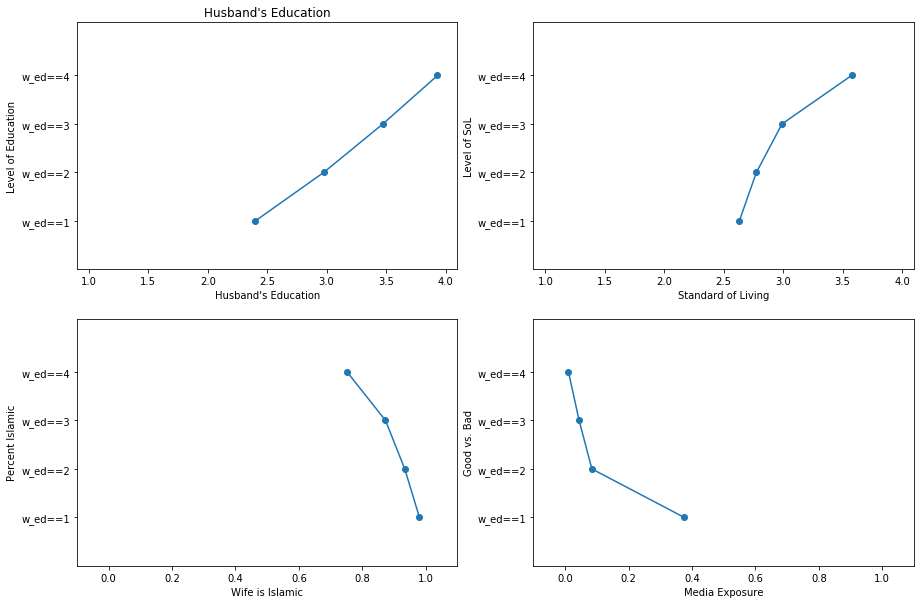

In [7]:
h_ed = (2.401316, 2.975976, 3.473171, 3.932409)
sol = (2.631579, 2.774775, 2.990244, 3.575390)
w_islam = (0.980263, 0.933934, 0.873171, 0.752166)
med_ex = (0.375000, 0.084084, 0.043902, 0.010399)

y1 = ("w_ed==1","w_ed==2", "w_ed==3", "w_ed==4")

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(h_ed, y1, 'o-')
plt.title("Husband's Education")
plt.xlabel("Husband's Education")
plt.xlim([0.9, 4.1])
plt.ylabel('Level of Education')
plt.ylim([-1, 4.1])

plt.subplot(2, 2, 2)
plt.plot(sol, y1, 'o-', label="Standard of Living")
plt.xlabel("Standard of Living")
plt.xlim([0.9, 4.1])
plt.ylabel("Level of SoL")
plt.ylim([-1, 4.1])

plt.subplot(2, 2, 3)
plt.plot(w_islam, y1, 'o-', label="Wife is Islamic")
plt.xlabel("Wife is Islamic")
plt.xlim([-0.1, 1.1])
plt.ylabel("Percent Islamic")
plt.ylim([-1, 4.1])

plt.subplot(2, 2, 4)
plt.plot(med_ex, y1, 'o-', label="Media Exposure")
plt.xlabel("Media Exposure")
plt.xlim([-0.1, 1.1])
plt.ylabel("Good vs. Bad")
plt.ylim([-1, 4.1])

plt.show()

Next, I would like to take a look at the ages of the women in each of the groups.  First let's graph the total population.

Text(0.5,1,'Total Number of Children of Women')

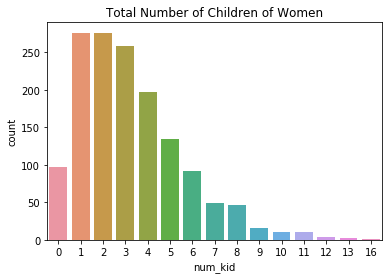

In [8]:
sns.countplot(x='num_kid', data=df).set_title("Total Number of Children of Women")

Next, let's find the same plot for each of the different contraceptive methods.

Text(0.5,1,'Number of Children of Women Not Using Contraception')

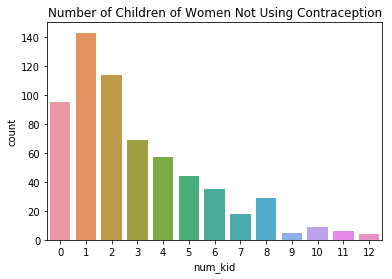

In [9]:
sns.countplot(x='num_kid', data=df1).set_title("Number of Children of Women Not Using Contraception")

Text(0.5,1,'Number of Children of Women Using Long-term Contraception')

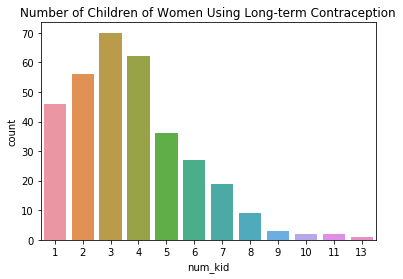

In [10]:
sns.countplot(x='num_kid', data=df2).set_title("Number of Children of Women Using Long-term Contraception")

Text(0.5,1,'Number of Children of Women Using Short-term Contraception')

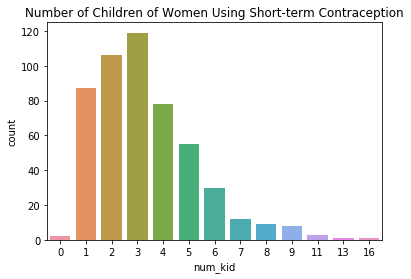

In [11]:
sns.countplot(x='num_kid', data=df3).set_title("Number of Children of Women Using Short-term Contraception")

Aha!  This is extremely interesting!!!  It appears that <b><u>no one</b></u> using long-term contraception is without child!  That means that all 333 out of the 1,473 women who are currently using long-term contraception have at least one child.  And less than five (out of a total of 511) of the women on short-term contraception are childless.  Where approximately 95 of the 628 women who are not using contraception are childless.  In other words, <u>approximately 95%</u> of the women who do <b>not</b> have a child are <b><u>not using contraception</b></u>!

## The Plot Thickens

What a strange trend!  How can upwards of 98% of married Indonsian women who are not using contraception keeping from becoming pregnant?!  Is there common knowledge in Indonesia of basal body temperature to monitor menstruation? Do married women in Indonesian abstain from sex until they want to have children?  Let's take a look at the ages of these women to see if there is a trend.

In [12]:
df4 = df[df['num_kid']==0]
df4.describe()

,w_age,w_ed,h_ed,num_kid,w_islam,home,h_job,sol,med_ex,cont
count,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,27.546392,2.907216,3.474227,0.0,0.845361,0.546392,2.278351,2.989691,0.041237,1.041237
std,7.603481,1.031610,0.855044,0.0,0.363439,0.500429,0.850763,1.035765,0.199871,0.285684
min,17.000000,1.000000,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,22.000000,2.000000,3.000000,0.0,1.000000,0.000000,2.000000,2.000000,0.000000,1.000000
50%,26.000000,3.000000,4.000000,0.0,1.000000,1.000000,2.000000,3.000000,0.000000,1.000000
75%,30.000000,4.000000,4.000000,0.0,1.000000,1.000000,3.000000,4.000000,0.000000,1.000000
max,49.000000,4.000000,4.000000,0.0,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


Now let's group the data by the ages of the women.  Perhaps most of the women are very young, early in their marriages, and possibly working.

In [13]:
df4.groupby('w_age').aggregate(np.mean)

,w_ed,h_ed,num_kid,w_islam,home,h_job,sol,med_ex,cont
w_age,,,,,,,,,
17,2.000000,2.000000,0.0,1.000000,0.000000,3.000000,2.000000,0.000000,3.000000
18,3.000000,4.000000,0.0,1.000000,0.000000,3.000000,1.000000,0.000000,1.000000
19,3.000000,3.250000,0.0,0.750000,0.750000,2.500000,2.750000,0.000000,1.000000
20,3.000000,4.000000,0.0,0.800000,0.600000,2.600000,3.200000,0.000000,1.000000
21,2.333333,3.333333,0.0,0.888889,0.777778,2.555556,3.000000,0.111111,1.222222
22,3.214286,3.357143,0.0,1.000000,0.785714,2.000000,2.857143,0.071429,1.000000
23,3.666667,3.333333,0.0,0.666667,0.666667,1.666667,3.333333,0.000000,1.000000
24,3.500000,4.000000,0.0,0.750000,0.250000,2.000000,2.500000,0.000000,1.000000
25,3.142857,3.571429,0.0,0.857143,0.714286,2.142857,3.428571,0.000000,1.000000


Text(0.5,1,'Ages of Women With No Children Not Using Contraception')

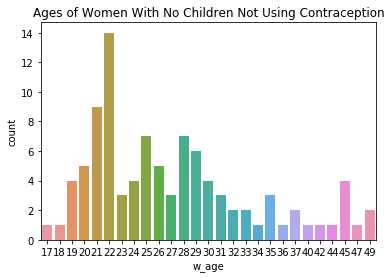

In [14]:
sns.countplot(x='w_age', data=df4).set_title("Ages of Women With No Children Not Using Contraception")

So according to the bar graph above, a little over one-third of Indonesian women with no children who are not using contraception are less than 23 years old, and approximately 50% are less than 26.  Although these do not sound like outrageous statistics, I would have expected lower means.  It seems that a significant percentage of women are remaining child-free into their later years.